# MACHINE LEARNING GROUP PROJECT 

### Group Members: Mila Gardini (54742), Monica Navas (54577), Helena .....(ADD NAMES)

## **Index**
* [Import libraries](#libraries)
* [Importing and Reading Data](#data)
* [Exploratory Data Analysis](#eda)
* [Initial Model](#model)

<a name="libraries"></a>
## Importing Libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

<a name="data"></a>
## Loading Dataset

In [100]:
df=pd.read_csv("./dataset/covtype_data.csv")

<a name="eda"></a>
## Exploratory Data Analysis

In [101]:
# Define column names
col_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology ',
             'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
             'Horizontal_Distance_To_Fire_Points']

# Generate names for binary columns based on their position
binary_col_names = [i+1 for i in range(4)]
binary_col_names += [i+1 for i in range(40)]

# Append the binary column names to the list of column names
col_names += binary_col_names

# Append the target variable name to the list of column names
col_names.append('Cover_Type_code')

# Rename the columns in the DataFrame
df.columns = col_names
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,32,33,34,35,36,37,38,39,40,Cover_Type_code
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581007,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581008,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581009,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [102]:
# Print the first few rows of the DataFrame
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,32,33,34,35,36,37,38,39,40,Cover_Type_code
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [103]:
# Print the summary statistics of the numerical columns
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,32,33,34,35,36,37,38,39,40,Cover_Type_code
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051465
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792,1.396500
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [104]:
# Print the count of each target value
df['Cover_Type_code'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9492
4      2747
Name: Cover_Type_code, dtype: int64

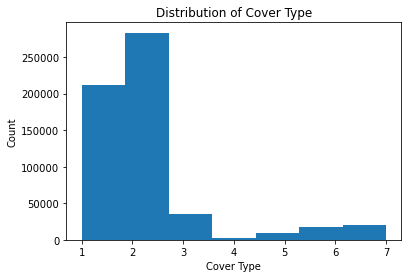

In [105]:
# Plot a histogram of the target variable
plt.hist(df['Cover_Type_code'], bins=7)
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.title('Distribution of Cover Type')
plt.show()

In [106]:
#Grouping the soil type columns into 1 column
df['Soil type code'] = df.iloc[:, 14:54].idxmax(axis=1)
df = pd.concat([df.iloc[:, :14], df.iloc[:, 54:]], axis=1)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,1,2,3,4,Cover_Type_code,Soil type code
0,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,5,29
1,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,2,12
2,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,2,30
3,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,5,29
4,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,2,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,3,2
581007,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,3,2
581008,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,3,2
581009,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,3,2


In [107]:
#Grouping the Wilderness Areas columns into 1 column
df['Wilderness area code'] = df.iloc[:, 10:14].idxmax(axis=1)
df = pd.concat([df.iloc[:, :10], df.iloc[:, 14:]], axis=1)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type_code,Soil type code,Wilderness area code
0,2590,56,2,212,-6,390,220,235,151,6225,5,29,1
1,2804,139,9,268,65,3180,234,238,135,6121,2,12,1
2,2785,155,18,242,118,3090,238,238,122,6211,2,30,1
3,2595,45,2,153,-1,391,220,234,150,6172,5,29,1
4,2579,132,6,300,-15,67,230,237,140,6031,2,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,3,2,3
581007,2391,152,19,67,12,95,240,237,119,845,3,2,3
581008,2386,159,17,60,7,90,236,241,130,854,3,2,3
581009,2384,170,15,60,5,90,230,245,143,864,3,2,3


In [108]:
df1=df.copy()
#add a column with the description of codes for Soil type and wilderness areas
Wilderness_areas_list=['Rawah Wilderness Area','Neota Wilderness Area','Comanche Peak Wilderness Area' ,'Cache la Poudre Wilderness Area']
df1['Wilderness area description']=[Wilderness_areas_list[col-1] for col in df1['Wilderness area code']]

list_of_soil_type=pd.read_csv("./dataset/list_of_soil_types.csv")
list_of_soil_type=list(list_of_soil_type)
df1['soil type description']=[list_of_soil_type[col-1] for col in df1['Soil type code']]

new_order = [col for col in df1.columns if col != 'Cover_Type_code'] + ['Cover_Type_code']
df1 = df1[new_order]

cover_type_list=['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz']
df1['cover type description']=[cover_type_list[col-1] for col in df1['Cover_Type_code']]
df1

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil type code,Wilderness area code,Wilderness area description,soil type description,Cover_Type_code,cover type description
0,2590,56,2,212,-6,390,220,235,151,6225,29,1,Rawah Wilderness Area,"Como - Legault families complex, extremely stony.",5,Aspen
1,2804,139,9,268,65,3180,234,238,135,6121,12,1,Rawah Wilderness Area,"Legault family - Rock land complex, stony.",2,Lodgepole Pine
2,2785,155,18,242,118,3090,238,238,122,6211,30,1,Rawah Wilderness Area,Como family - Rock land - Legault family compl...,2,Lodgepole Pine
3,2595,45,2,153,-1,391,220,234,150,6172,29,1,Rawah Wilderness Area,"Como - Legault families complex, extremely stony.",5,Aspen
4,2579,132,6,300,-15,67,230,237,140,6031,29,1,Rawah Wilderness Area,"Como - Legault families complex, extremely stony.",2,Lodgepole Pine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,2,3,Comanche Peak Wilderness Area,"Vanet - Ratake families complex, very stony.",3,Ponderosa Pine
581007,2391,152,19,67,12,95,240,237,119,845,2,3,Comanche Peak Wilderness Area,"Vanet - Ratake families complex, very stony.",3,Ponderosa Pine
581008,2386,159,17,60,7,90,236,241,130,854,2,3,Comanche Peak Wilderness Area,"Vanet - Ratake families complex, very stony.",3,Ponderosa Pine
581009,2384,170,15,60,5,90,230,245,143,864,2,3,Comanche Peak Wilderness Area,"Vanet - Ratake families complex, very stony.",3,Ponderosa Pine


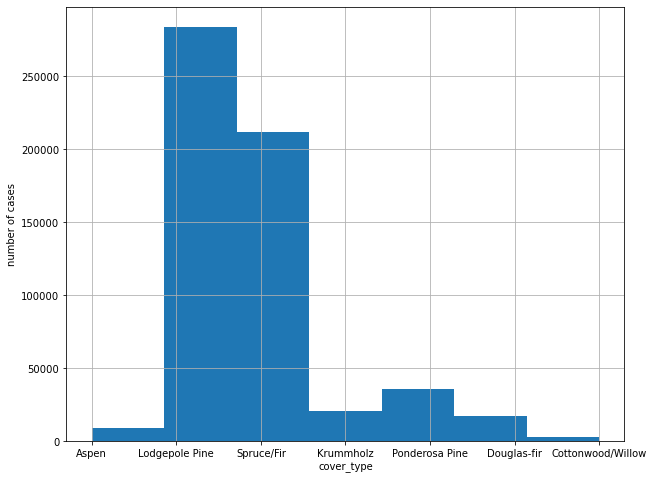

In [109]:
# plot a histogram of the 'cover type description' column
plt.figure(figsize=(10, 8))

df1['cover type description'].hist(bins=7)

# display the plot
plt.xlabel('cover_type')
plt.ylabel('number of cases')
plt.show()

## Decision Tree


In [110]:
#define features and target variables
X = df.drop("Cover_Type_code", axis=1) #FEATURES 
y = df["Cover_Type_code"] #TARGET VARIABLE

# Here, we define the type of training method (nothing happens yet)
clf = tree.DecisionTreeClassifier()
# Now, we train (fit) the method on the (X,y) dataset
clf.fit(X, y)
# clf **has been changed** and now contains the trained model

DecisionTreeClassifier()

In [111]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 3044.50
|   |--- feature_0 <= 2510.50
|   |   |--- feature_10 <= 8.00
|   |   |   |--- feature_3 <= 15.00
|   |   |   |   |--- feature_11 <= 3.50
|   |   |   |   |   |--- feature_9 <= 399.50
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_9 >  399.50
|   |   |   |   |   |   |--- feature_5 <= 1320.00
|   |   |   |   |   |   |   |--- feature_1 <= 255.50
|   |   |   |   |   |   |   |   |--- feature_7 <= 196.50
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 237.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- feature_6 >  237.50
|   |   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |--- feature_7 >  196.50
|   |   |   |   |   |   |   |   |   |--- feature_9 <= 1589.00
|   |   |   |   |   |   |   |   |   |   |--- feature_8 <= 166.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- feature_8 >

### Training and evaluating a decision tree with a test set (holdout)

In [120]:
X = df.drop("Cover_Type_code", axis=1) #FEATURES 
y = df["Cover_Type_code"] #TARGET VARIABLE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape) # instances for training
print(X_test.shape, y_test.shape)   # instances for testing

from sklearn import metrics
from sklearn import tree

# Here, we set our model to classification tree
clf = tree.DecisionTreeClassifier()
# Making results reproducible, in case training a tree contains random decisions
np.random.seed(42)
# Now, we train it
clf.fit(X_train, y_train)
# We can see that the tree is inside
print(tree.export_text(clf))

(464808, 12) (464808,)
(116203, 12) (116203,)
|--- feature_0 <= 3044.50
|   |--- feature_0 <= 2510.50
|   |   |--- feature_10 <= 8.00
|   |   |   |--- feature_3 <= 15.00
|   |   |   |   |--- feature_11 <= 3.50
|   |   |   |   |   |--- feature_9 <= 399.50
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_9 >  399.50
|   |   |   |   |   |   |--- feature_5 <= 1369.00
|   |   |   |   |   |   |   |--- feature_0 <= 2491.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 2371.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 249.50
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |   |--- feature_1 >  249.50
|   |   |   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |   |   |--- feature_0 >  2371.50
|   |   |   |   |   |   |   |   |   |--- feature_5 <= 504.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- feature_5 >  504.50
|   |   |   |   |   |   |   |   |   

In [126]:
#find accuracy and error 
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


print("Tree Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
   
print("\n",'Train Mean Squared Error:', mean_squared_error(y_train, y_train_pred))
print("\n",'Test Mean Squared Error:', mean_squared_error(y_test, y_test_pred))

Tree Accuracy: 0.9378673528222163

 Train Mean Squared Error: 0.0

 Test Mean Squared Error: 0.30555149178592633
